# Problem Set 09: CPs and Constraint Propagation

In this problem set you will practice constraint programs (CPs) and implement constraint propagation.

0. [Credit for Contributors (required)](#contributors)

1. [Modeling for Constraint Programming (50 points)](#problem1)
    1. [Chair-centric approach (25 points)](#part_1a)
    2. [People-centric approach (25 points)](#part_1b)
      
2. [Constraint Propagation (50 points)](#problem2)
    1. [Achieving arc consistency (30 points)](#part_2a)
    2. [Solution deduction (10 points)](#part_2b)
    3. [Constraint propagation guarantee(10 points)](#part_2c)
    
**100 points** total for Problem Set 9


## <a name="contributors"></a> Credit for Contributors

List the various students, lecture notes, or online resouces that helped you complete this problem set:

Ex: I worked with Bob on the cat activity planning problem.

<div class="alert alert-info">
Write your answer in the cell below this one.
</div>

I worked with Tom Stuart, Skye Eiskowitz, and the twins on this assignment.

## <a name="problem1"></a> Problem 1: Modeling for Constraint Programming (50 points)

You are a screen writer designing the story board for an episode of a sitcom, “Buddies", a “Friends" knockoff, with the ever adorable John, Mary, Tim, Lisa and Bill. You have decided to center the hour episode around an intimate table in a restaurant that has only three chairs. You would like the story to show each “buddy" at some point during the episode (part of their contract), and you want them interacting happily together. But there seems to be some dissension amongst the cast:

- John refuses to be seated with Mary or Tim

- There is a dialogue with John talking with Lisa,

- The romance between Lisa and Tim requires time at the table for a kiss,

- Bill only gets along with John if Lisa is there as well,

- John and Lisa, as the stars, should be on camera for 40 minutes (and only 40 min), while the remainder should be on for 20 minutes each (and only 20min).

A chair can be empty in a segment. No more than one person per seat.

You may assume that the characters change locations only at the breakpoints between the show's 20-
minute segments. You should express this problem in terms of a constraint satisfaction problem. You
should define the variables, domains and the constraints. For the constraints, there are multiple ways
to express them. There are no hard requirements on the format of the expression.

### <a name="part_1a"></a>Part A - Chair-centric approach (25 points)
First assume that there are nine variables, each representing one of the chairs during one of the three 20-minute segments of the show. Write down the domain of these variables and express the constraints. How many different possible valid assignments are there? 

Hint: The chair a person is sitting on and the specific segment matters

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

Be sure to include: representation of CSP with variables, domains, and constraints. Determination of number of possible assignments.

9 Variables... V = { V_11, V_12, V_13, V_21, V_22, V_23, V_31, V_32, V_33}, e.g. the chairs one, two and three for each of the segments. <br>V_11 is chair one for the first 20 min segment, V_32 is chair three for the second 20 minute segment, so on and so forth. <br>
<br>
The domain for each chair:<br>
D = {J, M, T, L, B, E}, e.g. Jim, Mary, TIme, Lisa, Bill, or EMPTY<br>
<br>
Set of Constraints C:<br>
1)For all m, NOT (V_mj=J and V_mk=M); m, j, k= 1, 2, or 3 and j does not equal k<br>
2)For all m, NOT (V_mj=J and V_mk=T); m, j, k= 1, 2, or 3 and j does not equal k<br>
3)For one m= 1, 2, or 3, (V_mj=J AND V_mk=L); j, k = 1, 2, or 3 and j does not equal k<br>
4)For one m= 1, 2, or 3, (V_mj=T AND V_mk=L); j, k = 1, 2, or 3 and j does not equal k<br>
5)For all m, (V_mj=J AND V_mk=B AND V_ml=L) OR NOT(V_mj=J AND V_mk=B); j, k, l = 1, 2 or 3 and j not equal to k, k not equal to l, j not equal to l
6)There exists an m, n and i such that (V_mk=J AND V_nk=J AND V_ik does not equal J); m, n, i, k = 1, 2 or 3; m does not equal n does not equal i
7)There exists an m, n and i such that (V_mk=L AND V_nk=L AND V_ik does not equal L); m, n, i, k = 1, 2 or 3; m does not equal n does not equal i
8)There exists only one m such that V_mj=T; m, j= 1,2,or 3<br>
9)There exists only one m such that V_mj=B; m, j= 1,2,or 3<br>
10)There exists only one m such that V_mj=M; m, j= 1,2,or 3<br>
11)(V_mj does not equal V_mk does not equal V_ml) OR (V_mj=V_mk=E); for m=1,2,3 and for j,k,l=1,2,3 and j does not equal k does not equal l

<br><br>
Looking at the constraints, the only possible assigmnets are some sort of variation around the following:<br>
Segment X: J, L, B<br>
Segment Y: M, T, L<br>
Segment Z: J, E, E<br>
These could appear in any permutation in any order, but it's the set that satisfies this chair-centric approach. <br>
The number of permutations for Segment X is 3 factorial or 6;<br>
The number of permutations for Segment Y is also 3 factorial or 6; <br>
Finally he Segment Z permutation is only 3 ways.<br>
Because there are three segments, this is 3 factorial or 6 permutations;<br>
Summing all of these up, there are 6*(6*6*3) total assignments or 648 permutations

### <a name="part_1b"></a>Part B - People-centric approach (25 points)
Now take a people-centric approach. Assume that there exists one variable for each person, and the value a variable takes is the chair assignments for each of the 20 minute segment (note that at a given segment a person might be assigned no chair). Write down the domain of all the variables and comment on the number of possible assignments.

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

Be sure to include: representation of CSP with variables, domains, and constraints. Determination of number of possible assignments.

In this formulation, V has 5 variables= V_J, V_M, V_B, V_L, V_T;<br>
Here the letter after the V signifies the name of the cast member. <br><br>
The domain for an assignment could look like (C1, C2, Empty); this means that the V_x is assigned to sit in the first chair during segement 1, chair 2 during the second segment, and not at all in the third segment. I think that drives us to 4^3 domain values in each domain. 
<br><br>
The number of feasible solutions is the same as in Part A; however, this may be simpler to solve using constraint propagation because there are many assignments that are infeasible and can be pruned easily.

## <a name="problem2"/></a> Problem 2 : Constraint Propagation (50 points)

Consider the following constraint graph. There are five variables, denoted 1-5. Each variable has a domain of three values: {A,B,C}. The only valid assignments to pairs of constraints variables are given in the following table.

<img src="csp_image.png" style="width:100%;"/>


### <a name="part_2a"></a>Part A - Achieving arc consistency (30 points)
Repeatedly perform constraint propagation on the above constraint graph until you achieve arc
consistency, by crossing out the eliminated values on each node of the graph. List the remaining elements
for each domain.

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

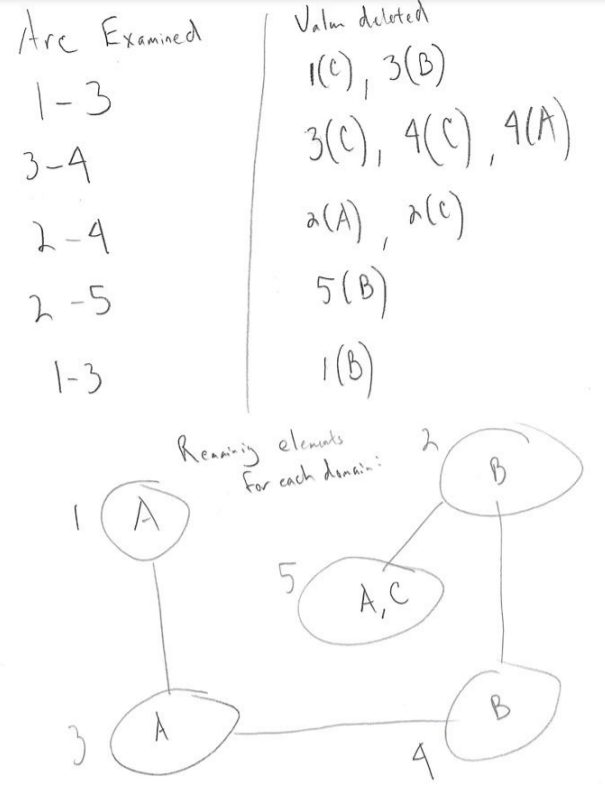

In [9]:
from IPython.core.display import Image, display
display(Image(filename='pset9.PNG'))

### <a name="part_2b"></a>Part B - Solution deduction (25 points)
What is the maximum number of possible solutions, based only on the knowledge of the remaining values?

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

Based on the remaining vars, there are only two possible assignments:<br>
1:A, 2:B, 3: A, 4: B, 5:A; or 1:A, 2:B, 3: A, 4: B, 5:C.

### <a name="part_2c"></a>Part C - Constraint propagation guarantee (25 points)
In general, does constraint propagation guarantee that all infeasible assignments are pruned? Explain.

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

No, in general Constraint Propogation doesn't guarantee that all infeasible assignments are pruned. Sometimes propagation will fail to prune any infeasile solutions! Generally speaking, this method performs poorly when there is a large number of variables. It performs more effectively when the size of the constraints is small. 